# Data Collection

In [155]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [157]:
df = pd.read_csv('https://raw.githubusercontent.com/washingtonpost/data-school-shootings/master/school-shootings-data.csv')

# Data Cleaning

In [160]:
# We will start with seeing the structure to fully understand what kind of data we have.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 50 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   uid                               416 non-null    int64  
 1   nces_school_id                    410 non-null    object 
 2   school_name                       416 non-null    object 
 3   nces_district_id                  392 non-null    float64
 4   district_name                     391 non-null    object 
 5   date                              416 non-null    object 
 6   school_year                       416 non-null    object 
 7   year                              416 non-null    int64  
 8   time                              386 non-null    object 
 9   day_of_week                       416 non-null    object 
 10  city                              416 non-null    object 
 11  state                             416 non-null    object 
 12  school_t

In [162]:
df[[
    'nces_school_id', 
    'district_name', 
    'time', 
    'gender_shooter1',
    'race_ethnicity_shooter1',
    'shooter_relationship1',
    'deceased_notes1',
    'gender_shooter2',
    'race_ethnicity_shooter2',
    'shooter_relationship2',
    'deceased_notes2',
    'black',
    'hispanic',
    'weapon',
    'weapon_source',
    'low_grade',
    'high_grade',
    'lunch',
    'county']].mode()
# As a rule in BI when there is more than one most used in the data set, we then take the first one.

,nces_school_id,district_name,time,gender_shooter1,race_ethnicity_shooter1,shooter_relationship1,deceased_notes1,gender_shooter2,race_ethnicity_shooter2,shooter_relationship2,deceased_notes2,black,hispanic,weapon,weapon_source,low_grade,high_grade,lunch,county
0,010237000962,Los Angeles Unified,12:00 PM,m,w,student,suicide,m,b,student,suicide,4,0,handgun,father,9,12,268,Los Angeles County
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,w,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,377,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,495,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,502,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,569,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,775,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,941,NaN


In [164]:
df['nces_school_id'] = df['nces_school_id'].fillna(df['nces_school_id'].mode()[0])
df['district_name'] = df['district_name'].fillna(df['district_name'].mode()[0])
df['time'] = df['time'].fillna(df['time'].mode()[0])
df['gender_shooter1'] = df['gender_shooter1'].fillna(df['gender_shooter1'].mode()[0])
df['race_ethnicity_shooter1'] = df['race_ethnicity_shooter1'].fillna(df['race_ethnicity_shooter1'].mode()[0])
df['shooter_relationship1'] = df['shooter_relationship1'].fillna(df['shooter_relationship1'].mode()[0])
df['deceased_notes1'] = df['deceased_notes1'].fillna(df['deceased_notes1'].mode()[0])
df['gender_shooter2'] = df['race_ethnicity_shooter1'].fillna(df['race_ethnicity_shooter1'].mode()[0])
df['race_ethnicity_shooter2'] = df['deceased_notes1'].fillna(df['deceased_notes1'].mode()[0])
df['shooter_relationship2'] = df['shooter_relationship2'].fillna(df['shooter_relationship2'].mode()[0])
df['deceased_notes2'] = df['deceased_notes2'].fillna(df['deceased_notes2'].mode()[0])
df['black'] = df['black'].fillna(df['black'].mode()[0])
df['hispanic'] = df['hispanic'].fillna(df['hispanic'].mode()[0])
df['weapon'] = df['district_name'].fillna(df['district_name'].mode()[0])
df['weapon_source'] = df['weapon_source'].fillna(df['weapon_source'].mode()[0])
df['low_grade'] = df['low_grade'].fillna(df['low_grade'].mode()[0])
df['high_grade'] = df['high_grade'].fillna(df['high_grade'].mode()[0])
df['lunch'] = df['lunch'].fillna(df['lunch'].mode()[0])
df['county'] = df['county'].fillna(df['county'].mode()[0])

In [166]:
df['nces_district_id'] = df['nces_district_id'].fillna(df['nces_district_id'].mean())
df['age_shooter1'] = df['age_shooter1'].fillna(df['age_shooter1'].mean())
df['shooter_deceased1'] = df['shooter_deceased1'].fillna(df['shooter_deceased1'].mean())
df['age_shooter2'] = df['age_shooter2'].fillna(df['age_shooter2'].mean())
df['shooter_deceased2'] = df['shooter_deceased2'].fillna(df['shooter_deceased2'].mean())
df['white'] = df['white'].fillna(df['white'].mean())
df['asian'] = df['asian'].fillna(df['asian'].mean())
df['american_indian_alaska_native'] = df['american_indian_alaska_native'].fillna(df['american_indian_alaska_native'].mean())
df['hawaiian_native_pacific_islander'] = df['hawaiian_native_pacific_islander'].fillna(df['hawaiian_native_pacific_islander'].mean())
df['two_or_more'] = df['two_or_more'].fillna(df['two_or_more'].mean())
df['lat'] = df['lat'].fillna(df['lat'].mean())
df['long'] = df['long'].fillna(df['long'].mean())
df['staffing'] = df['staffing'].fillna(df['staffing'].mean())
df['ulocale'] = df['ulocale'].fillna(df['ulocale'].mean())

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 50 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   uid                               416 non-null    int64  
 1   nces_school_id                    416 non-null    object 
 2   school_name                       416 non-null    object 
 3   nces_district_id                  416 non-null    float64
 4   district_name                     416 non-null    object 
 5   date                              416 non-null    object 
 6   school_year                       416 non-null    object 
 7   year                              416 non-null    int64  
 8   time                              416 non-null    object 
 9   day_of_week                       416 non-null    object 
 10  city                              416 non-null    object 
 11  state                             416 non-null    object 
 12  school_t

## Data Exploration & Analysis

In [171]:
df

,uid,nces_school_id,school_name,nces_district_id,district_name,date,school_year,year,time,day_of_week,...,lat,long,staffing,low_grade,high_grade,lunch,county,state_fips,county_fips,ulocale
0,1,080480000707,Columbine High School,804800.0,Jefferson County R-1,4/20/1999,1998-1999,1999,11:19 AM,Tuesday,...,39.603910,-105.075000,89.600000,9,12,41,Jefferson County,8,8059,21.0
1,2,220054000422,Scotlandville Middle School,2200540.0,East Baton Rouge Parish School Board,4/22/1999,1998-1999,1999,12:30 PM,Thursday,...,30.529958,-91.169966,39.000000,6,8,495,East Baton Rouge Parish,22,22033,12.0
2,3,130441001591,Heritage High School,1304410.0,Rockdale County,5/20/1999,1998-1999,1999,8:03 AM,Thursday,...,33.626922,-84.047960,84.000000,9,12,125,Rockdale County,13,13247,21.0
3,4,421899003847,John Bartram High School,4218990.0,Philadelphia City SD,10/4/1999,1999-2000,1999,10:00 AM,Monday,...,39.921509,-75.234108,41.000000,9,12,2007,Philadelphia County,42,42101,11.0
4,5,250279000225,Dorchester High School,2502790.0,Boston,11/3/1999,1999-2000,1999,7:40 AM,Wednesday,...,42.285268,-71.075901,61.911803,9,12,543,Suffolk County,25,25025,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,418,110003000079,Dunbar High School,1100030.0,District Of Columbia Public Schools,5/3/24,2023-2024,2024,9:55 AM,Friday,...,38.907695,-77.012836,60.500000,9,12,584,District Of Columbia,11,11001,11.0
412,419,550999000385,Mount Horeb Middle School,5509990.0,Mount Horeb Area School District,5/1/24,2023-2024,2024,11:00 AM,Wednesday,...,43.006314,-89.728462,41.730000,6,8,64,Dane County,55,55025,31.0
413,420,370150000631,Parkland High School,3701500.0,Winston Salem / Forsyth County Schools,5/7/24,2023-2024,2024,12:00 PM,Tuesday,...,36.057000,-80.257100,89.640000,9,12,1510,Forsyth County,37,37067,12.0
414,421,530771001171,Garfield High School,5307710.0,Seattle School District NO. 1,6/7/24,2023-2024,2024,12:45 PM,Friday,...,47.605000,-122.301900,68.200000,9,12,660,King County,53,53033,11.0


In [173]:
print('Rows: {} Columns: {} Size: {}'.format(df.shape[0], df.shape[1], df.size))

Rows: 416 Columns: 50 Size: 20800


In [175]:
df = df.drop(
    ['nces_school_id',
    'school_name',
    'nces_district_id', 
    'district_name', 
    'school_year', 
    'shooter_deceased1', 
    'deceased_notes1', 
    'shooter_deceased2', 
    'deceased_notes2',
    'white',
    'black',
    'hispanic',
    'asian',
    'american_indian_alaska_native',
    'hawaiian_native_pacific_islander',
    'two_or_more',
    'weapon',
    'weapon_source',
    'lat', 
    'long', 
    'county',
    'city',
    'race_ethnicity_shooter1',
    'shooter_relationship1',
    'race_ethnicity_shooter2',
    'shooter_relationship2',
    'state_fips',
    'date',
    'time',
    'county_fips'], axis=1)

In [177]:
print('Columns left: {}'.format(df.shape[1]))

Columns left: 20


In [179]:
# Get information about the data
df.describe()

,uid,year,killed,injured,casualties,age_shooter1,age_shooter2,resource_officer,staffing,ulocale
count,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000
mean,209.423077,2014.875000,0.507212,1.105769,1.598558,19.194444,16.916667,0.252404,61.911803,19.760291
std,121.550243,7.595417,2.105631,2.155042,3.720979,8.003781,0.245031,0.434915,38.175691,10.605439
min,1.000000,1999.000000,0.000000,0.000000,0.000000,6.000000,15.000000,0.000000,3.000000,11.000000
25%,104.750000,2008.000000,0.000000,0.000000,0.000000,15.000000,16.916667,0.000000,34.300000,11.000000
50%,208.500000,2018.000000,0.000000,1.000000,1.000000,18.000000,16.916667,0.000000,58.110000,13.000000
75%,312.250000,2021.000000,0.000000,1.000000,1.000000,19.194444,16.916667,1.000000,84.250000,22.000000
max,422.000000,2024.000000,26.000000,21.000000,34.000000,72.000000,20.000000,1.000000,227.180000,43.000000


array([[<Axes: title={'center': 'uid'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'killed'}>],
       [<Axes: title={'center': 'injured'}>,
        <Axes: title={'center': 'casualties'}>,
        <Axes: title={'center': 'age_shooter1'}>],
       [<Axes: title={'center': 'age_shooter2'}>,
        <Axes: title={'center': 'resource_officer'}>,
        <Axes: title={'center': 'staffing'}>],
       [<Axes: title={'center': 'ulocale'}>, <Axes: >, <Axes: >]],
      dtype=object)

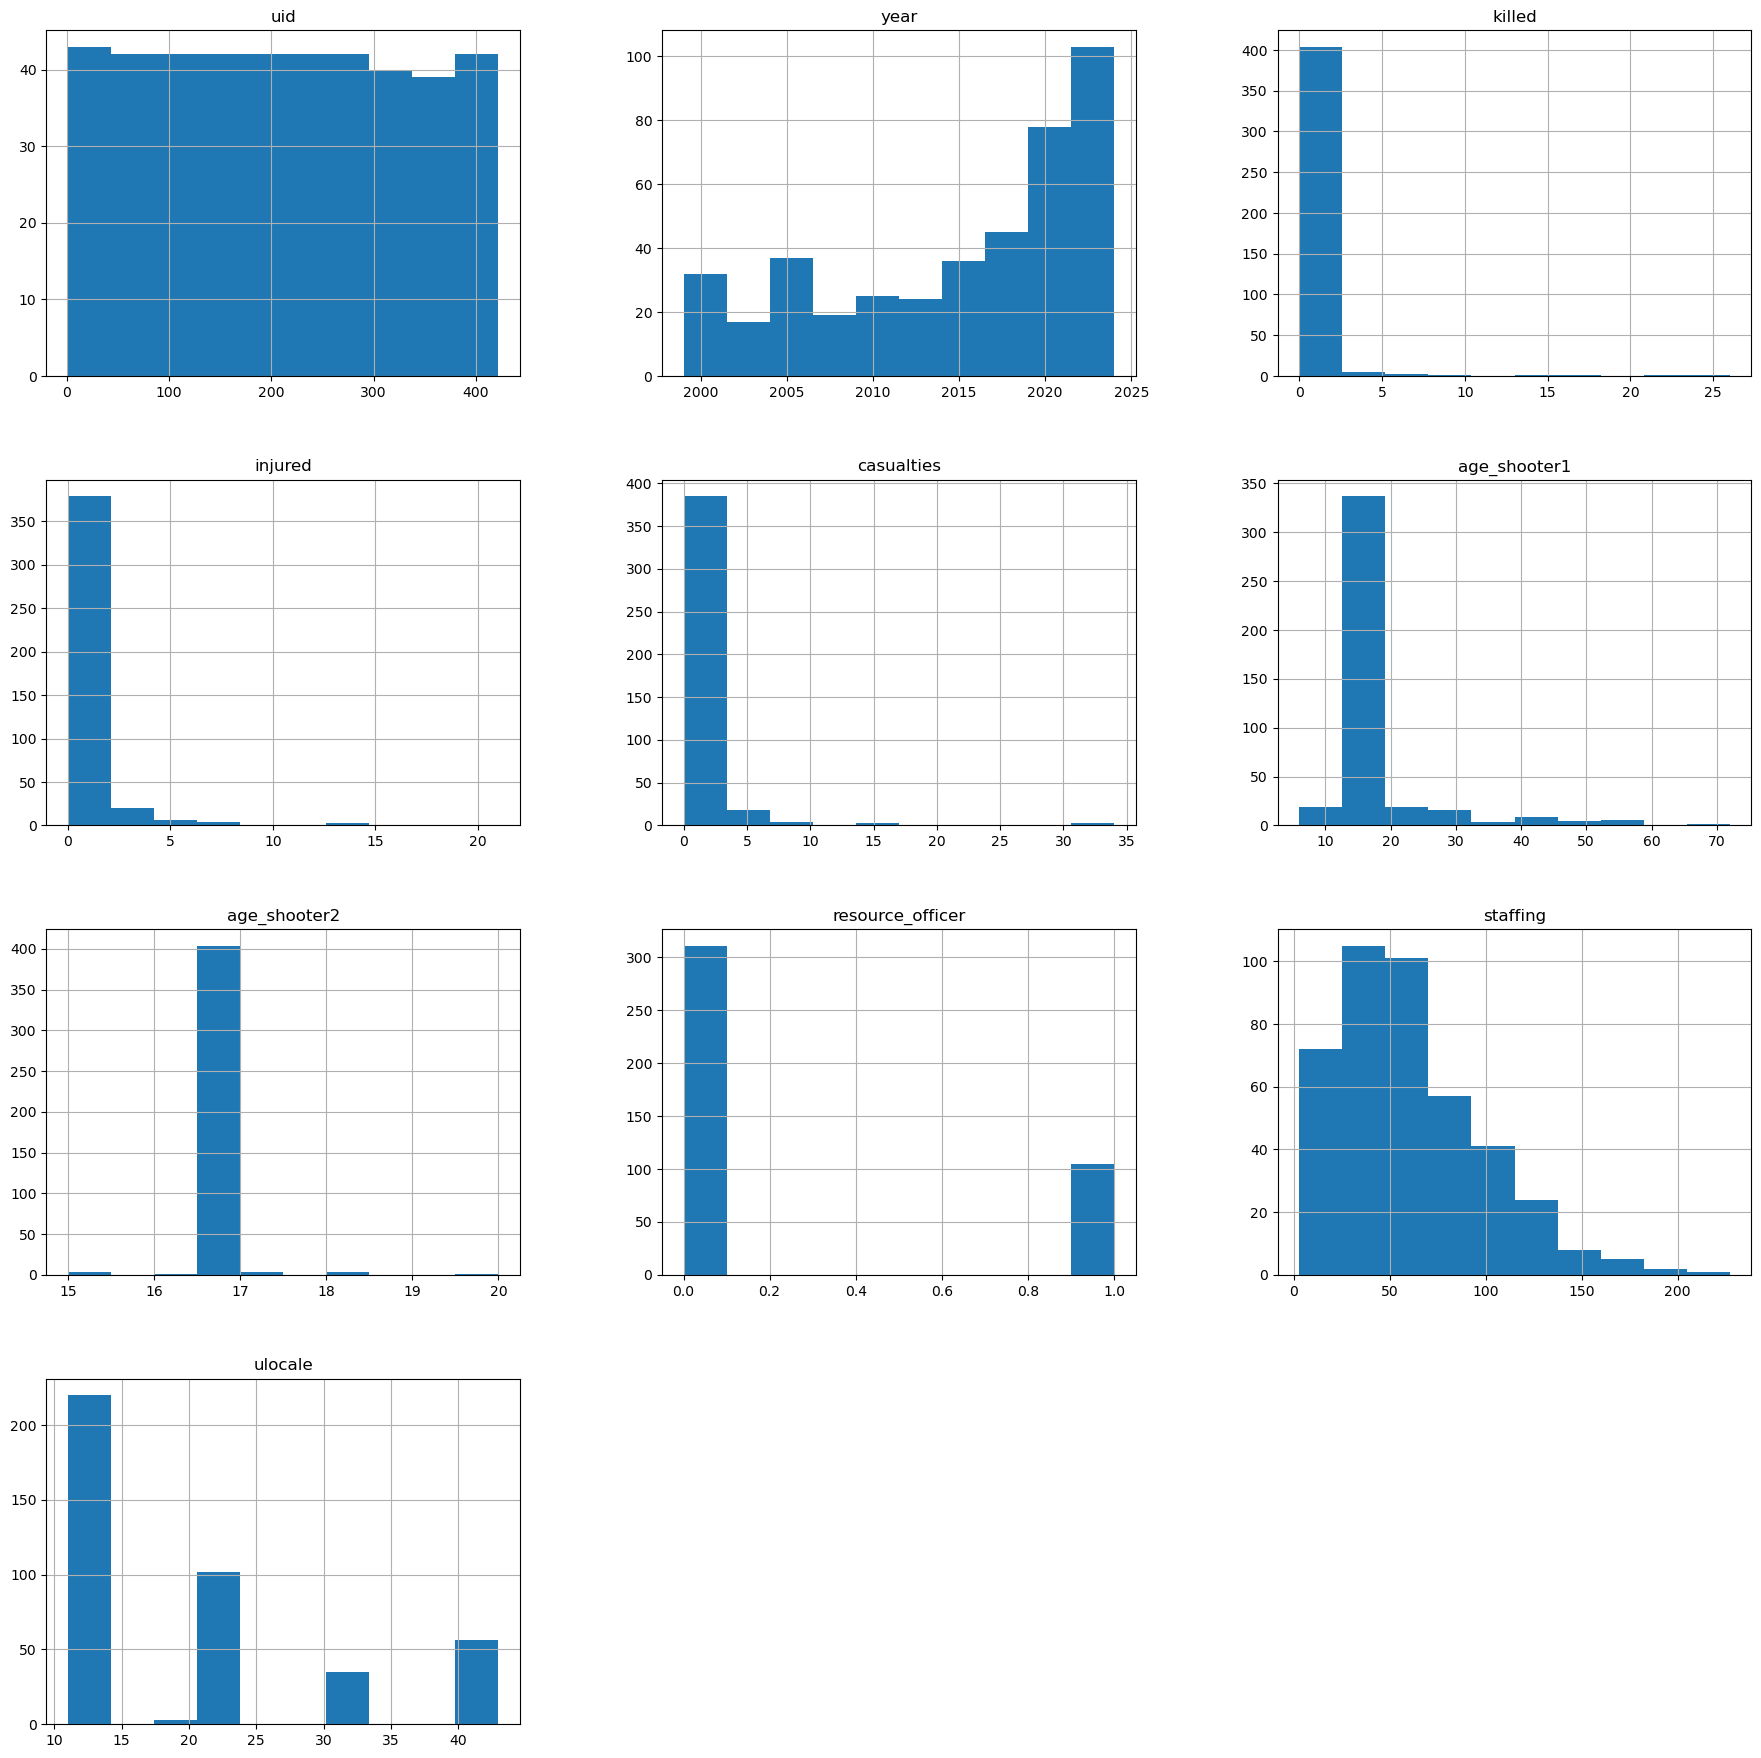

In [27]:
df.hist(figsize=(22, 22))

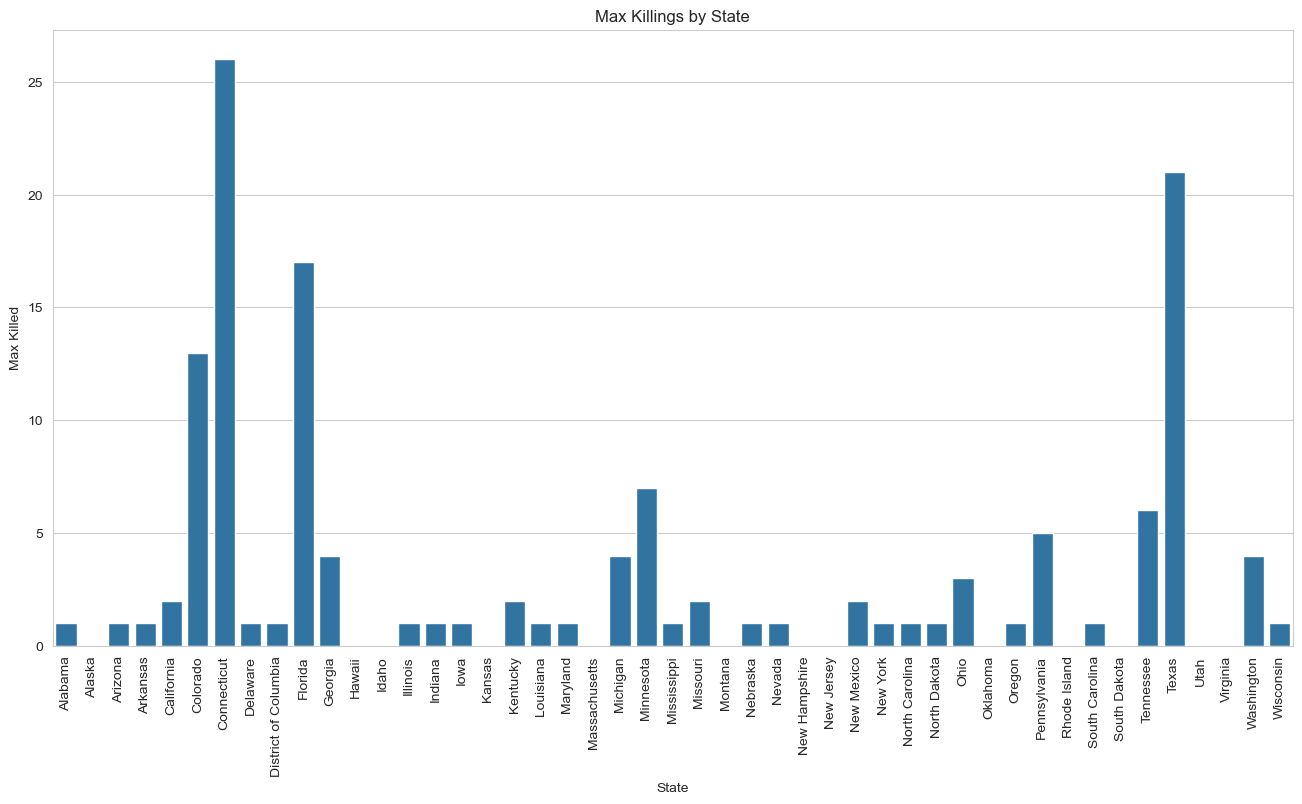

In [28]:
df_grouped = df.groupby('state')['killed'].max().reset_index()
sns.set_style("whitegrid")
plt.figure(figsize=(16, 8))
sns.barplot(x='state', y='killed', data=df_grouped)
plt.title('Max Killings by State')
plt.xlabel('State')
plt.ylabel('Max Killed')
plt.xticks(rotation=90)
plt.show()

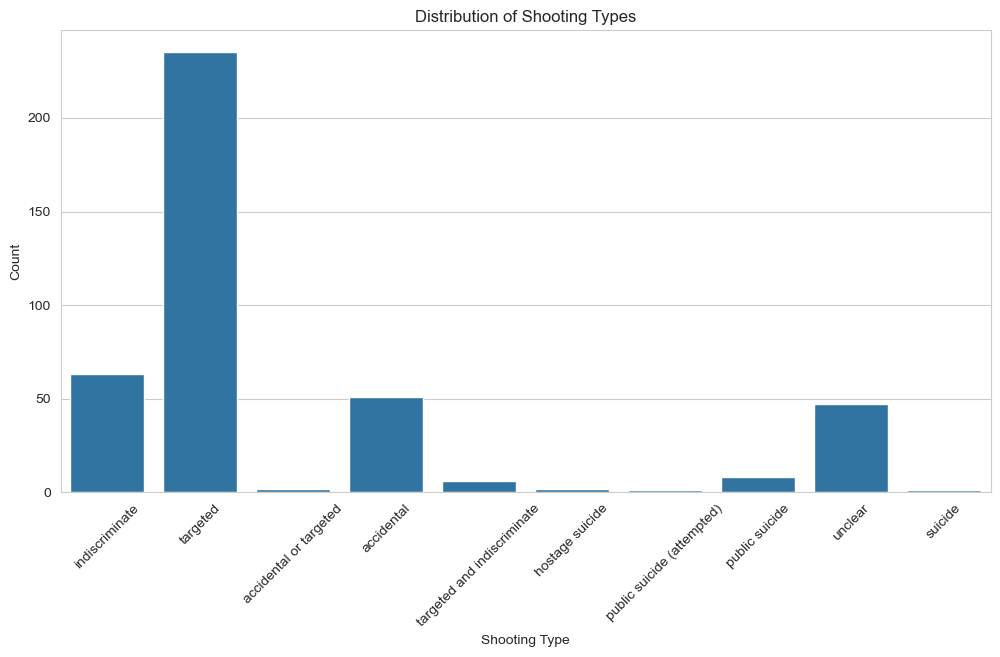

In [29]:
plt.figure(figsize=(12, 6))
sns.countplot(x='shooting_type', data=df)
plt.title('Distribution of Shooting Types')
plt.xlabel('Shooting Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

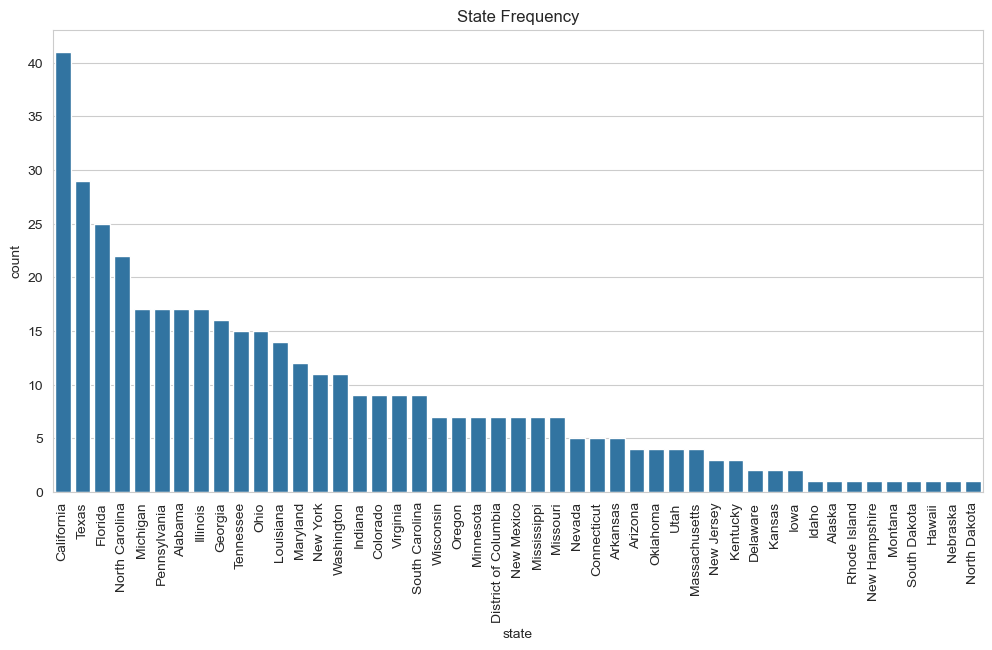

In [30]:
# Count plot for 'state'
plt.figure(figsize=(12, 6))
sns.countplot(x='state', data=df, order=df['state'].value_counts().index)
plt.title('State Frequency')
plt.xticks(rotation=90)
plt.show()

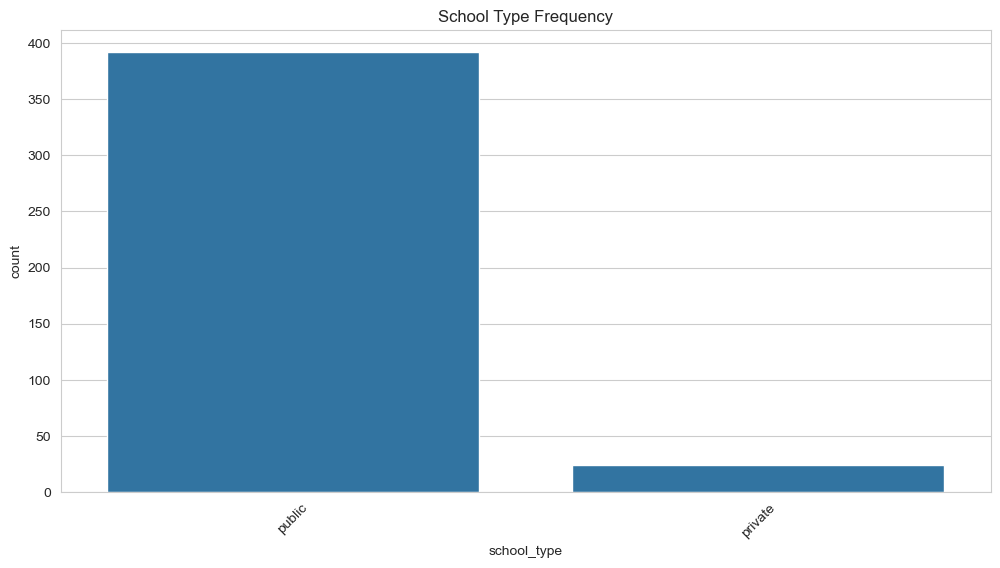

In [33]:
# Count plot for 'school_type'
plt.figure(figsize=(12, 6))
sns.countplot(x='school_type', data=df)
plt.title('School Type Frequency')
plt.xticks(rotation=45)
plt.show()

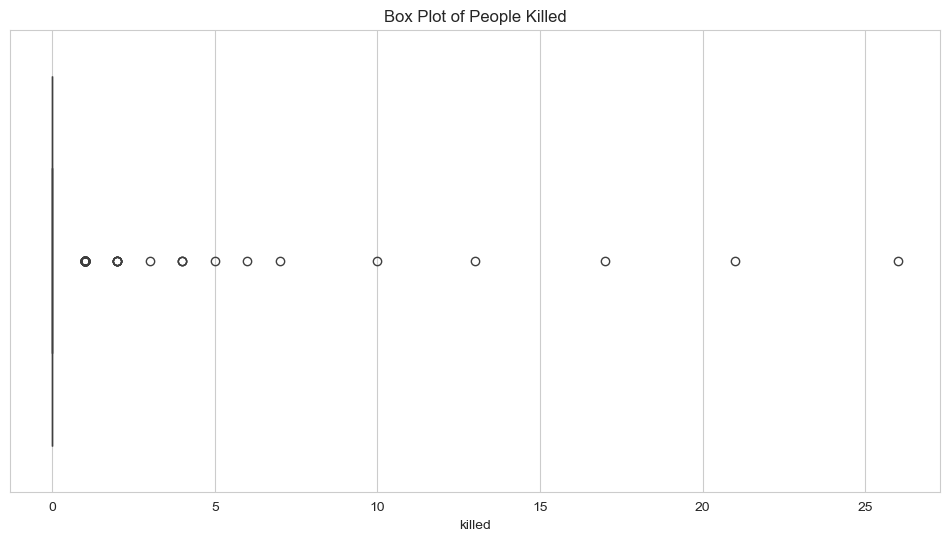

0.05    0.0
0.25    0.0
0.50    0.0
0.75    0.0
0.95    1.0
Name: killed, dtype: float64


In [37]:
# Box plot for 'killed'
plt.figure(figsize=(12, 6))
sns.boxplot(x='killed', data=df)
plt.title('Box Plot of People Killed')
plt.show()
print(df.killed.quantile([0.05, 0.25, 0.50, 0.75, 0.95]))

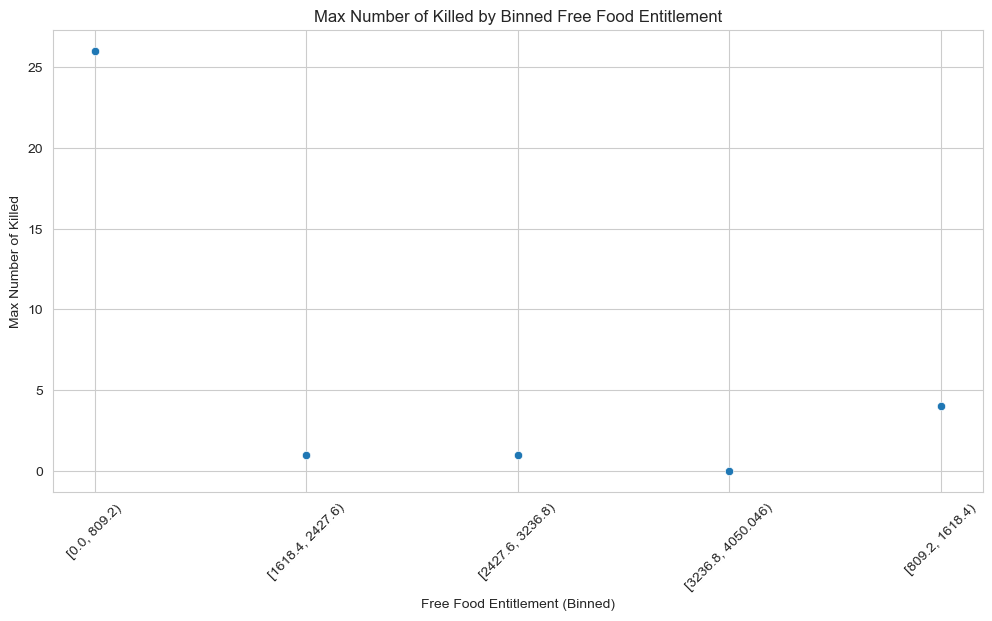

In [181]:
# Step 1: Check for non-numeric values in 'lunch'
#non_numeric_values = df[~df['lunch'].apply(lambda x: str(x).replace('.', '', 1).isdigit())]

# Step 2: Convert 'lunch' to numeric and handle errors (non-numeric values become NaN)
df['lunch'] = pd.to_numeric(df['lunch'], errors='coerce')

# Step 3: Handle NaN values (replace with 0, median, or drop them)
df['lunch'] = df['lunch'].fillna(0)  # You can also use df['lunch'].fillna(df['lunch'].median())

# Step 4: Bin the 'lunch' column starting from 0
df['lunch_binned'] = pd.cut(df['lunch'], bins=5, right=False, include_lowest=True)

# Step 5: Convert 'lunch_binned' to strings for plotting
df['lunch_binned_str'] = df['lunch_binned'].astype(str)

# Step 6: Recalculate max number of 'killed' for each bin
binned_data = df.groupby('lunch_binned_str')['killed'].max().reset_index()

# Step 7: Scatter plot between binned 'lunch_binned_str' and max 'killed'
plt.figure(figsize=(12, 6))
sns.scatterplot(x='lunch_binned_str', y='killed', data=binned_data)
plt.title('Max Number of Killed by Binned Free Food Entitlement')
plt.xlabel('Free Food Entitlement (Binned)')
plt.ylabel('Max Number of Killed')
plt.xticks(rotation=45)
plt.show()

In [183]:
# One hot encoding. Changing the strings to numbers. 
df_dummies = pd.get_dummies(df)

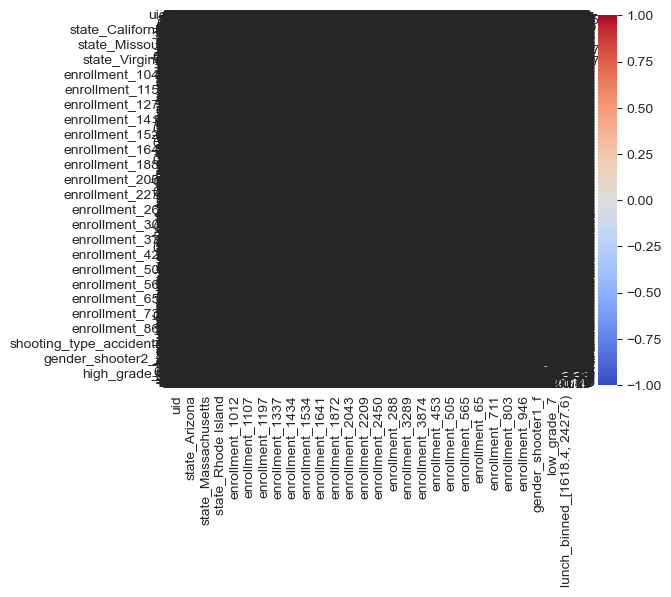

In [43]:
sns.heatmap(df_dummies.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

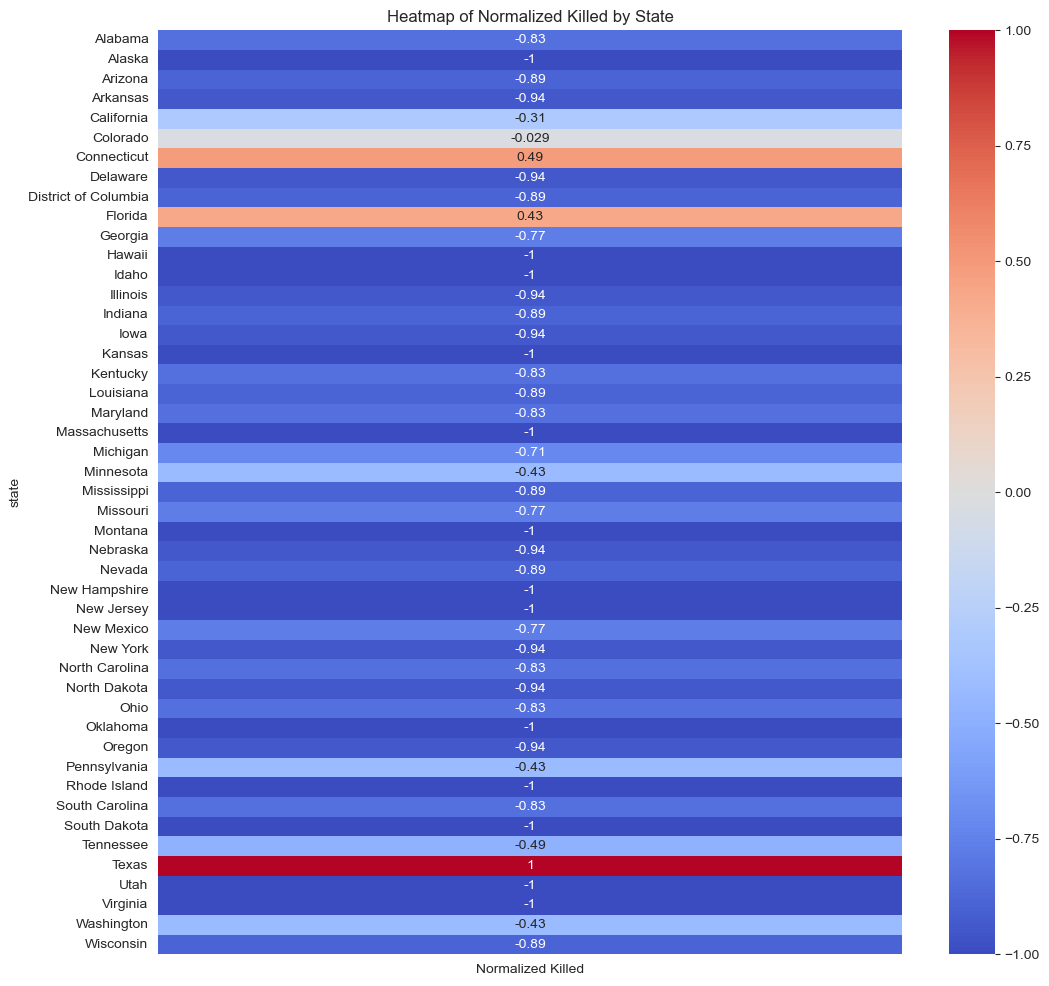

In [185]:
from sklearn.preprocessing import MinMaxScaler

# Antag, at din DataFrame har en kolonne 'state' og en kolonne 'killed'
# Aggregere data per stat
aggregated_df = df.groupby('state')['killed'].sum().reset_index()

# Normalisere data til intervallet [0, 1]
scaler = MinMaxScaler(feature_range=(-1, 1))
aggregated_df['Normalized Killed'] = scaler.fit_transform(aggregated_df[['killed']])

# Opret en DataFrame til heatmap
heatmap_data = pd.DataFrame(aggregated_df['Normalized Killed'].values, index=aggregated_df['state'], columns=['Normalized Killed'])

# Tegn heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm')
plt.title('Heatmap of Normalized Killed by State')
plt.show()

# Data Modelling 

In [188]:
df.columns

Index(['uid', 'year', 'day_of_week', 'state', 'school_type', 'enrollment',
       'killed', 'injured', 'casualties', 'shooting_type', 'age_shooter1',
       'gender_shooter1', 'age_shooter2', 'gender_shooter2',
       'resource_officer', 'staffing', 'low_grade', 'high_grade', 'lunch',
       'ulocale', 'lunch_binned', 'lunch_binned_str'],
      dtype='object')

In [190]:
from sklearn.utils import shuffle
df_shuffled = shuffle(df_dummies, random_state=42)

In [192]:
DV = 'killed' # Save our killed column as DV (Dependent variable)
X = df_shuffled.drop(DV, axis=1) # From our shuffled data we're going to remove our DV and axis = 1 (means our columns).
y = df_shuffled[DV] # This will only give us the 'killed column.

In [194]:
# Building machine learning model
from sklearn.model_selection import train_test_split

# Our machine needs data to train to predict y. Therefore our X is our training data.
# test_size = 0.33 meaning we will use 33% data to test our model.
# X_train & y_train (our training data (67%))
# X_test & y_test (our test data(33%))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Linear Regression

In [196]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [198]:
model.fit(X_train, y_train)

LinearRegression()

In [200]:
intercept = model.intercept_
coefficient = model.coef_
print(intercept)
print(coefficient)

16.222044542603278
[ 1.60762446e-03 -8.41649740e-03 -1.25276909e+00  1.11260651e+00
 -1.02518432e-02  4.73723349e-02 -3.83272451e-02  7.16300478e-04
 -6.31525911e-05  1.21769377e-02 -7.04473621e-02 -1.20289102e-01
 -9.15751733e-02  1.08717312e-01  1.73594325e-01 -9.17033980e-02
 -1.03812999e-02 -9.52169693e-02 -1.57598919e-01 -2.05086610e-01
  3.57876318e-01  8.61878932e-02 -2.48597830e-01  3.38354532e-01
 -2.92464961e-01  9.49493088e-01  7.26780399e-02 -1.16116838e-12
 -1.67452276e-01 -1.35641230e-02  4.39879920e-02 -6.39633610e-02
  4.16327427e-01  2.25454434e-01 -1.82746091e-01 -5.22952047e-02
 -1.23251143e-01  6.57510334e-02 -1.89683958e-01  1.56620308e-01
  6.99339312e-02  1.17633598e-02 -2.52095766e-03 -2.97747937e-14
 -1.37207872e-01 -2.72022817e-01  1.08815634e-01 -9.52930459e-02
 -1.38222767e-14  2.00965755e-01  1.83502389e-02  2.96842764e-01
 -1.56377704e-02 -4.17860191e-14 -3.03492720e-01 -1.76122238e-01
  5.12377447e-02  1.05410209e-03 -1.89632642e-01 -1.64668026e-01
 -2.36

In [202]:
predictions = model.predict(X_test)

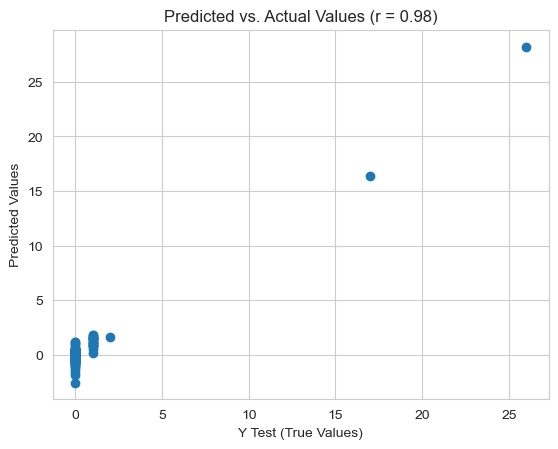

In [204]:
from scipy.stats import pearsonr
plt.scatter(y_test, predictions)
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values (r = {0:0.2f})'.format(pearsonr(y_test, predictions)[0]))
plt.show()

In [206]:
from sklearn import metrics
import numpy as np
"""Create metrics dataframe from pandas
MAE: Average absolute error between actual and predicted values. Model's predictions are off by about 6.052
MSE: Average squared error between actual and predicted values. Deviation of the predictions from the actual values is: 56.187
RMSE: Square root of MSE, providing error magnitude in the same unit as the target. The model's predictions deviate from the actual values by: 7.496
R-Squared: Proportion of variance explained by the model. R-squared value of 0.389 is : 38.9%
.round(3) gives us three decimals"""

metrics_df = pd.DataFrame({'Metric': ['MAE', 
                                      'MSE', 
                                      'RMSE', 
                                      'R-Squared'],
                          'Value': [metrics.mean_absolute_error(y_test, predictions),
                                    metrics.mean_squared_error(y_test, predictions),
                                    np.sqrt(metrics.mean_squared_error(y_test, predictions)),
                                    metrics.explained_variance_score(y_test, predictions)]}).round(3)

In [208]:
metrics_df

,Metric,Value
0,MAE,0.401
1,MSE,0.325
2,RMSE,0.570
3,R-Squared,0.954


# Multiple Regression

In [212]:
# create a model
linreg = LinearRegression()

# fit the model to our training data
linreg.fit(X_train, y_train)

LinearRegression()

In [218]:
intercept2 = linreg.intercept_
coef = linreg.coef_
print(intercept2)
print(coef)

16.222044542603278
[ 1.60762446e-03 -8.41649740e-03 -1.25276909e+00  1.11260651e+00
 -1.02518432e-02  4.73723349e-02 -3.83272451e-02  7.16300478e-04
 -6.31525911e-05  1.21769377e-02 -7.04473621e-02 -1.20289102e-01
 -9.15751733e-02  1.08717312e-01  1.73594325e-01 -9.17033980e-02
 -1.03812999e-02 -9.52169693e-02 -1.57598919e-01 -2.05086610e-01
  3.57876318e-01  8.61878932e-02 -2.48597830e-01  3.38354532e-01
 -2.92464961e-01  9.49493088e-01  7.26780399e-02 -1.16116838e-12
 -1.67452276e-01 -1.35641230e-02  4.39879920e-02 -6.39633610e-02
  4.16327427e-01  2.25454434e-01 -1.82746091e-01 -5.22952047e-02
 -1.23251143e-01  6.57510334e-02 -1.89683958e-01  1.56620308e-01
  6.99339312e-02  1.17633598e-02 -2.52095766e-03 -2.97747937e-14
 -1.37207872e-01 -2.72022817e-01  1.08815634e-01 -9.52930459e-02
 -1.38222767e-14  2.00965755e-01  1.83502389e-02  2.96842764e-01
 -1.56377704e-02 -4.17860191e-14 -3.03492720e-01 -1.76122238e-01
  5.12377447e-02  1.05410209e-03 -1.89632642e-01 -1.64668026e-01
 -2.36

In [220]:
y_predicted = linreg.predict(X_test)

In [222]:
y_predicted

array([-3.15829710e-01,  1.57564992e+00, -1.90961021e+00,  4.82193921e-01,
       -1.57102558e+00,  4.96490599e-01, -2.55924611e+00,  8.60832599e-02,
        1.75980548e+00,  1.10679843e+00,  1.86375541e-02, -8.60880321e-01,
       -5.25716128e-01,  1.16319177e-01, -4.14098914e-01, -1.78387860e-01,
        3.08638577e-02, -1.75998849e-01,  1.00182647e-01, -2.35037330e-01,
        1.86390690e-01, -3.42238940e-01,  1.54928099e-01, -2.95434117e-01,
        1.61179748e+00,  1.38015373e-01, -8.49925268e-01,  1.51590572e+00,
       -1.05830902e-01,  9.57755130e-02,  1.14371481e+00, -2.05028575e-01,
        2.82463250e+01,  1.02371017e+00, -9.07903718e-01, -1.13592792e-01,
       -3.95998544e-02,  5.12851496e-01,  1.63627854e+01,  2.30483439e-01,
       -1.05885367e-01, -7.19350593e-01, -4.49662890e-02,  3.32047341e-01,
        9.52352132e-01, -2.56468987e-01,  8.18942321e-01,  1.23140432e-01,
        5.03107824e-01, -6.00322827e-01, -3.50849548e-01,  4.25014534e-02,
        4.46752345e-01, -